# Genetic heritage:

In [2]:
# import libraries for later use
import numpy as np
import pandas as pd
import seaborn

In [3]:
string = ['CAGCGGGTGCGTAATTTGGAGAAGTTATTCTGCAACGAAATCAATCCTGTTTCGTTAGCTTACGGACTACGACGAGAGGGTACTTCCCTGATATAGTCAC',
         'CAAGTCGGGCGTATTGGAGAATATTTAAATCGGAAGATCATGTTACTATGCGTTAGCTCACGGACTGAAGAGGATTCTCTCTTAATGCAA',
         'CATGGGTGCGTCGATTTTGGCAGTAAAGTGGAATCGTCAGATATCAATCCTGTTTCGTAGAAAGGAGCTACCTAGAGAGGATTACTCTCACATAGTA',
         'CAAGTCCGCGATAAATTGGAATATTTGTCAATCGGAATAGTCAACTTAGCTGGCGTTAGCTTTACGACTGACAGAGAGAAACCTGTCCATCACACA',
         'CAAGTCCGGCGTAATTGGAGAATATTTTGCAATCGGAAGATCAATCTTGTTAGCGTTAGCTTACGACTGACGAGAGGGATACTCTCTCTAATACAA',
         'CACGGGCTCCGCAATTTTGGGTCAAGTTGCATATCAGTCATCGACAATCAAACACTGTTTTGCGGTAGATAAGATACGACTGAGAGAGGACGTTCGCTCGAATATAGTTAC',
         'CACGGGTCCGTCAATTTTGGAGTAAGTTGATATCGTCACGAAATCAATCCTGTTTCGGTAGTATAGGACTACGACGAGAGAGGACGTTCCTCTGATATAGTTAC']

In [4]:
# check the length and number of input:
print(len(string))
for i in string:
    print(len(i), end = " - ")

7
100 - 90 - 97 - 96 - 96 - 111 - 104 - 

## Longest common subsequence
### 1. Write python code to give the length of the longest common subsequence for two strings.


#### The Python to compute the longest comon subsequent (lcs) of 2 strings: 

In [5]:
def lcs(str1, str2, m, n):
    # take input str1 and str2: 2 strings
    # m,n are the length of str1 and str2, respectively
    # we store 2 matrix
    
    tracking = []
    storage = []
    #  matrix "tracking" is to track which scenario we got into (discuss later)
    #  matrix "storage" is to store the optimal lcs of subsequence of str1, str2
    # storage[i,j] is to store the optimal lcs of subsequence of str1[:i], str2[:j]
    
    # run from 0 to n (including n), creating the 2 matrixes
    for i in range(n+1):
        tracking.append([0] * (m+1))
        storage.append([0] * (m+1))
        
    # go through the column
    for i in range(m):
        # as Python start from index 0, we add 1 for universal and easier link to the matrix
        column = i+1
        # go through each datapoint
        for j in range(n):
            # as Python start from index 0, we add 1 for universal and easier link to the matrix
            row = j+1
            
            # we start from the begin of the string to the end
            # 3 scenarios:
            ### scenario 1: the 2 character is the same: take it into the lcs (+1)
            ##### and we move forward to the reraminding text: 
            ##### storage[row][column] = storage[row-1][column-1] + 1
            ##### else, if scenario 1 didn't happen, we consider the maximum of either
            ##### the str1 without that character and the remaining str2
            ##### OR the str2 without that character and the remaining str1:
            ##### storage[row][column-1], storage[row-1][column]
            ### scenario 2: storage[row][column-1] >= storage[row-1][column]:
            ##### storage[row][column-1] is max
            ### scenario 3: else:
            ##### storage[row-1][column] is max
            ### The reason we split into 3 cases is easier to mark into the tracking matrix
            
            # scenario 1
            if str1[i] == str2[j]:
                storage[row][column] = storage[row-1][column-1] + 1
                tracking[row][column] = "NW"
                # northwest: go up and left
            # scenario 2
            elif storage[row][column-1] >= storage[row-1][column]:
                storage[row][column] = storage[row][column-1]
                tracking[row][column] = "N"
                # north: go up
            # scenario 3
            else:
                storage[row][column] = storage[row-1][column]
                tracking[row][column] = "W"
                # west: go left
    return storage, tracking

# store the number of steps we need to make: the number of lcs
count = 0
def print_lcs(tracking, str1, m, n):
    # 4 parameters: 
    ### tracking: the tracking table
    ### str1: the string
    ### m, n: length of the 2 string
    global count
    
    #corner case: empty string
    if m == 0 or n == 0:
        return "NO"
    
    # "NW" happens: meaning we found 2 same character: lcs += 1
    if tracking[n][m] == "NW":
        count += 1
        print_lcs(tracking,str1, m-1, n-1)
        
    # "N" happens: we move up 1 stage: 
    # this is the reverse of move down: meaning we neglect that character of str2
    # hence, it's the reverse path of from m-1, n-1 -> m-1, n
    elif tracking[n][m] == "N":
        print_lcs(tracking,str1, m-1, n)
        
    # "W" happens: we move up 1 stage: 
    # this is the reverse of move right: meaning we neglect that character of str1
    # hence, it's the reverse path of from m-1, n-1 -> m, n-1
    elif tracking[n][m] == "W":
        print_lcs(tracking,str1, m, n-1)
    return count


In [9]:
m = len('a')
n = len('abc')        
storage, tracking = lcs('ab', 'abc', m, n)
length_lcs = print_lcs(tracking,'ab', m, n)
print(length_lcs)

4


#### Doing lcs for every pair in the 7 strings

In [5]:
# the table to store the lcs between strings
data = []

# the table to store the ratio lcs and the length of the string on the row
ratio = []

# go through the rows
for i in range(7):
    data.append([])
    ratio.append([])
    # go through each pair of string
    # data[i][j] is lcs between string[i] and string[j]
    # ratio[i][j] is the ratio between lcs between string[i] and string[j]
    ### and the length of string[i]
    for j in range(7):
        count = 0
        m = len(string[i])
        n = len(string[j])        
        storage, tracking = lcs(string[i], string[j], m, n)
        length_lcs = print_lcs(tracking,string[i], m, n)
        data[i].append(length_lcs)
        ratio[i].append(length_lcs/len(string[i]))


### 2. Generate the table of the lengths of the longest common subsequences for every pair of strings.

#### Use pandas.dataframe to import data into a table

$\textbf{Table 1: The table of the lcs between string[i] and string[j]}$

In [6]:
df_data = pd.DataFrame(data, columns=['string[0]','string[1]','string[2]',
                                      'string[3]','string[4]','string[5]','string[6]'])
df_data.rename(index={0:'string[0]',1:'string[1]',2:'string[2]',3:'string[3]',
                      4:'string[4]',5:'string[5]',6:'string[6]',}, inplace=True)
df_data

,string[0],string[1],string[2],string[3],string[4],string[5],string[6]
string[0],100,74,76,73,82,84,91
string[1],74,90,67,72,80,70,71
string[2],76,67,97,65,69,81,84
string[3],73,72,65,96,81,71,69
string[4],82,80,69,81,96,74,75
string[5],84,70,81,71,74,111,97
string[6],91,71,84,69,75,97,104


$\textbf{Table 2: The table of the ratio between the lcs between string[i] and string[j] }$
$\textbf{divide by the length of string[i]}$

In [7]:
df_ratio = pd.DataFrame(ratio, columns=['string[0]','string[1]','string[2]',
                                      'string[3]','string[4]','string[5]','string[6]'])
df_ratio.rename(index={0:'string[0]',1:'string[1]',2:'string[2]',3:'string[3]',
                      4:'string[4]',5:'string[5]',6:'string[6]',}, inplace=True)
df_ratio

,string[0],string[1],string[2],string[3],string[4],string[5],string[6]
string[0],1.000000,0.740000,0.760000,0.730000,0.820000,0.840000,0.910000
string[1],0.822222,1.000000,0.744444,0.800000,0.888889,0.777778,0.788889
string[2],0.783505,0.690722,1.000000,0.670103,0.711340,0.835052,0.865979
string[3],0.760417,0.750000,0.677083,1.000000,0.843750,0.739583,0.718750
string[4],0.854167,0.833333,0.718750,0.843750,1.000000,0.770833,0.781250
string[5],0.756757,0.630631,0.729730,0.639640,0.666667,1.000000,0.873874
string[6],0.875000,0.682692,0.807692,0.663462,0.721154,0.932692,1.000000


$\textbf{Using seaborn package to create heatmap demonstrating the distribution}$

$\textbf{Table 3: The heatmap of the lcs between string[i] and string[j]}$

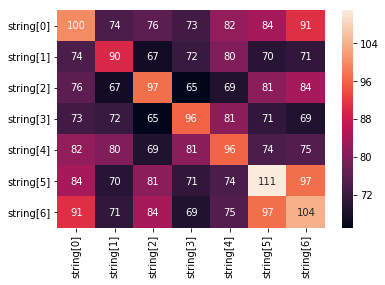

In [8]:
seaborn.heatmap(df_data, annot=True, fmt="d")

$\textbf{Table 4: The heatmap of the ratio between the lcs between string[i] and string[j] }$
$\textbf{divide by the length of string[i]}$

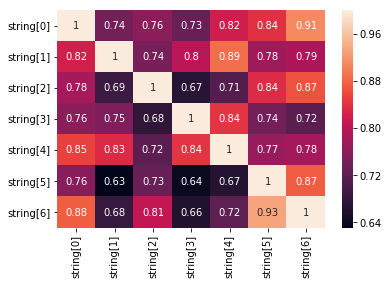

In [9]:
seaborn.heatmap(df_ratio, annot=True)

## Relationship Tree
### 3. Manually examine the table, and infer the relationships between strings. 

In [10]:
print("""     0""")
print("""    / \\""")
print("""   /   \\""")
print("""  4     6""")
print(""" / \\   / \\""")
print("""1   3 2   5""")

     0
    / \
   /   \
  4     6
 / \   / \
1   3 2   5


We must infer some foundation properties: 
1. If the 2 string has direct relationship, then they should have more similar lcs(). Direct relationship means the parents and the child.
2. The lcs() between 2 strings also depends on the length of the 2 original string. Hence, we will use the lcs ratio: the ratio between the length of the lcs and the the length of the original string. We are doing this to normalize the lcs on the scale of 1. (we can consider it similar to probability)
3. It is possible to assume the lcs ratio between direct relationship is higher than the other relationships.
4. We can also consider the relationship between the grandparents and the grandchild. The lcs ratio should be lower than direct relationship, but higher than other relationship. 

Now we take a look at table 4: We can see the diagonal line 1-1-1-1-1-1-1. They are 1 because the lcs between 2 same string is the exact string, which then will make the lcs ratio = 1. 

For each row, we consider the higher value (except 1) of lcs ratio: the highest value can imfer direct relationship:
- For string[0]: The highest is 0.91 -> string[0] and [6] has a direct relationship
- For string[1]: The highest is 0.89 -> string[1] and [4] has a direct relationship
- For string[2]: The highest is 0.87 -> string[2] and [6] has a direct relationship
- For string[3]: The highest is 0.84 -> string[3] and [4] has a direct relationship
- For string[4]: The highest is 0.85 -> string[4] and [0] has a direct relationship
- For string[5]: The highest is 0.87 -> string[5] and [6] has a direct relationship
- For string[6]: The highest is 0.93 -> string[6] and [5] has a direct relationship

We can see these relation: 0-6, 1-4, 2-6, 3-4, 4,0, 5-6, 6-5.

We consider the tree as 3 level: 
- "grand": the grandparents: will have direct relationship with its 2 children. Those 2 children will be called "parent"
- "parent": the child of grandparents: will have direct relationship with its 1 parent ("grand") and its 2 children. Those 2 children will be called "child"
- "child": the child of "parent": will have direct relationship with its 1 parent ("parent").

From the relationships, we can see that 6 appears in at least 3 direct relationships: 0-6, 2-6, 5-6: this implies $\textbf{6 is the "parent"}$

We can imply between 0, 2, 5: one will be "grand" and the other will be "child"      

From the relationships, we can see that 4 appears in at least 3 direct relationships: 1-4, 3-4, 4-0: this implies $\textbf{4 is the "parent"}$

- We can imply between 0, 1, 3: one will be "grand" and the other will be "child".
- From above: we can imply between 0, 2, 5: one will be "grand" and the other will be "child".
- Also, the tree can only have 1 "grand"
- The intersection of the 2 sets {0,1,3} and {0,2,5} is 0.

$\textbf{Hence, 0 is the "grand"}$

$\textbf{1, 3 are child of 4; 2, 5 are child of 6}$


$\textbf{The tree will be described as follow}$

In [11]:
print("""     0""")
print("""    / \\""")
print("""   /   \\""")
print("""  4     6""")
print(""" / \\   / \\""")
print("""1   3 2   5""")

     0
    / \
   /   \
  4     6
 / \   / \
1   3 2   5


## Probability of mutation, insertions and deletions
### 4. How would you estimate the probabilities of mutation, insertions and deletions? (There might not be enough data to give meaningful estimates, but at least have a clear idea of the approach.)
### 5.Can you devise an algorithm in the general case which might be able to infer such a tree of relationships? Give any strengths or weaknesses of your suggested algorithm.

The lcs algorithm works perfectly. However, merely the lcs cannot fully reflect the changes. There could be some randomized factors.

We now look at the edit distance algorithm: assuming the genetic function works in the optimal way: the edit_distance will return the minimal number of steps needed to take to transform from string A to string B using 3 operations: inserting a new character (insert), deleting an existing character (Remove), or changing to a new character (replace).

The foundation of the algorithm is as follow: transform string1 to string2
-  If last characters are same, ignore last character and perform recursion for remaining string 
- If last character are different, there are 3 possible scenarios and we will choose the one yields the smallest steps of those 3 scenarios:
- - scenario 1: we consider the string2 without that character and the remaining of string1 -> string1 insert 1 character to get string2
- - scenario 2: we consider the string1 without that character and the remaining of string2 -> string1 remove 1 character to get string2
- - scenario 3: we consider the string1 and string2 without that character perform recursion for the remaining of string1 and string2 -> string1 replace 1 character to get string2

We maintain 2 tables to store the local optimal solutions: one table is to store the optimal steps transforming string1[:i] to string2[:j] at row[i], column[j]; the other one if to store the scenario (the optimal operation) we take at the specific moment.

Here is the implementation:

In [12]:
def edit_distance(string1, string2, m, n): 
    # take input str1 and str2: 2 strings
    # m,n are the length of str1 and str2, respectively
    
    # we store 2 matrix
    # data1 is to store the optimal result of subproblems
    # path1 is to track which scenario we got into (discuss later)
    
    # run from 0 to m (including m), creating the 2 matrixes
    data1 = []
    path1 = []
    for i in range(m+1):
        data1.append([0] * (n+1))
        path1.append([0] * (n+1))
    
    # go through the column
    for i in range(m+1): 
        # go through each datapoint
        for j in range(n+1): 
  
            # If string1 is empty, we insert all characters of string2
            if i == 0: 
                # each data point is j because we insert j times
                data1[i][j] = j    
  
            # If string2 is empty, we remove all characters of string2
            elif j == 0: 
            # each data point is i because we remove i times
                data1[i][j] = i  
  
            # If last characters are same, ignore last character and perform 
            ### recursion for remaining string 
            elif string1[i-1] == string2[j-1]: 
                data1[i][j] = data1[i-1][j-1] 
            
            else:
            # If last character are different, there are 3 possible scenarios:
            ### scenario 1: we consider the string2 without that character and 
            ##### the remaining of string1 -> string1 insert 1 character to get string2
            ### scenario 2: we consider the string1 without that character and 
            ##### the remaining of string2 -> string1 remove 1 character to get string2
            ### scenario 3: we consider the string1 and string2 without that character
            ##### perform recursion for the remaining of string1 and string2
            ##### -> string1 replace 1 character to get string2
            
            # We need to find the minimum of the 3 scenarios
            ### the one yields the minimum will be the action we take
            ### and we +1 into the previous move
            # Also, we input the action into the path1 table
                if data1[i][j-1] == min(data1[i][j-1],data1[i-1][j], data1[i-1][j-1]):
                # insertion scenario: scenario 1   
                    data1[i][j] = 1 + data1[i][j-1] 
                    path1[i][j] = "insert"
                elif data1[i-1][j] == min(data1[i][j-1],data1[i-1][j], data1[i-1][j-1]):
                # deletion scenario: scenario 2
                    path1[i][j] = "remove"
                    data1[i][j] = 1 + data1[i-1][j] 
                elif  data1[i-1][j-1] == min(data1[i][j-1],data1[i-1][j], data1[i-1][j-1]):
                # replacement scenario: scenario 3    
                    path1[i][j] = "replace"
                    data1[i][j] = 1 + data1[i-1][j-1]
    # data[m][n] is the final node: the minimum number of performance 
    ### to transform string1 -> string2       
    return data1[m][n], path1


def print_editchange(path1,string1, m, n):
    # 4 parameters: 
    ### path1: the path1 table
    ### string1: the string
    ### m,n: length of the 2 string
    
    # global these 3 variables as 0,0,0 
    global insert, remove, replace
    
    #corner case: empty string
    if m == 0 or n == 0:
        return "NO"
    
    # replace scenario: from m,n case traces back to the m-1,n-1 case
    if path1[m][n] == "replace":
        replace += 1
        print_editchange(path1,string1, m-1, n-1)
        
    # remove scenario: from m,n case traces back to the m-1,n case
    elif path1[m][n] == "remove":
        remove += 1
        print_editchange(path1,string1, m-1, n)
        
    # remove scenario: from m,n case traces back to the m,n-1 case
    elif path1[m][n] == "insert":
        insert += 1
        print_editchange(path1,string1, m, n-1)
        
    # other scenario: when no performance needed 
    ### could be same string or there are no other character in either strings
    # we move on to next step in these scenarios
    else:
        print_editchange(path1,string1, m-1, n-1)
    
    # return the number of these performance in these scenarios
    # insert+remove+replace is the total number of changes
    return insert+remove+replace, insert, remove, replace  

#### We now then go through every pair of string to compute the number of changes, the number of changes in each operations needed to make string A -> string B. We also keep track of the ratio: because the number of changes depends on the length of the string as well (the longer the string, the more likely that we have to use more operations). Hence, we divide by the length of the string to normalize the data. 

In [13]:
# track the number of changes
changes_track = []
insert_track = []
remove_track = []
replace_track = []
changes_ratio_track = []
insert_ratio_track = []
remove_ratio_track = []
replace_ratio_track = []

# gp through every pair
for i in range(7):
    changes_track.append([])
    insert_track.append([])
    remove_track.append([])
    replace_track.append([])
    changes_ratio_track.append([])
    insert_ratio_track.append([])
    remove_ratio_track.append([])
    replace_ratio_track.append([])
    for j in range(7):
        # length of 2 input string
        m = len(string[i])
        n = len(string[j])        
        num, path = edit_distance(string[i], string[j], m, n)
        insert = 0
        remove = 0
        replace = 0
        a,b,c,d = print_editchange(path, string[i], m, n)
        changes_track[i].append(a)
        insert_track[i].append(b)
        remove_track[i].append(c)
        replace_track[i].append(d)
        changes_ratio_track[i].append(a/len(string[i]))
        insert_ratio_track[i].append(b/len(string[i]))
        remove_ratio_track[i].append(c/len(string[i]))
        replace_ratio_track[i].append(d/len(string[i]))

### Table 5: The table represent the number of changes to transform string[i] to string[j]

In [14]:
df_changes_track = pd.DataFrame(changes_track, columns=['string[0]','string[1]','string[2]',
                                                        'string[3]','string[4]','string[5]','string[6]'])
df_changes_track.rename(index={0:'string[0]',1:'string[1]',2:'string[2]',3:'string[3]',
                      4:'string[4]',5:'string[5]',6:'string[6]',}, inplace=True)
df_changes_track

,string[0],string[1],string[2],string[3],string[4],string[5],string[6]
string[0],0,35,34,41,26,33,19
string[1],35,0,42,31,18,50,43
string[2],34,42,0,45,38,37,23
string[3],41,31,45,0,23,51,47
string[4],26,18,38,23,0,46,39
string[5],33,50,37,51,46,0,19
string[6],19,43,23,47,39,19,0


### Table 6: The heatmap represents the number of changes to transform string[i] to string[j]

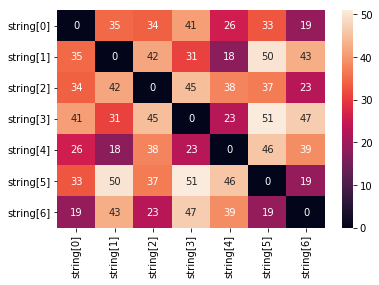

In [15]:
seaborn.heatmap(df_changes_track, annot=True)

### Table 7: The table represent the changes divided by the length of the string[i] to transform string[i] to string[j]

In [16]:
df_changes_ratio_track = pd.DataFrame(changes_ratio_track, columns=['string[0]','string[1]','string[2]',
                                                        'string[3]','string[4]','string[5]','string[6]'])
df_changes_ratio_track.rename(index={0:'string[0]',1:'string[1]',2:'string[2]',3:'string[3]',
                      4:'string[4]',5:'string[5]',6:'string[6]',}, inplace=True)
df_changes_ratio_track

,string[0],string[1],string[2],string[3],string[4],string[5],string[6]
string[0],0.000000,0.350000,0.340000,0.410000,0.260000,0.330000,0.190000
string[1],0.388889,0.000000,0.466667,0.344444,0.200000,0.555556,0.477778
string[2],0.350515,0.432990,0.000000,0.463918,0.391753,0.381443,0.237113
string[3],0.427083,0.322917,0.468750,0.000000,0.239583,0.531250,0.489583
string[4],0.270833,0.187500,0.395833,0.239583,0.000000,0.479167,0.406250
string[5],0.297297,0.450450,0.333333,0.459459,0.414414,0.000000,0.171171
string[6],0.182692,0.413462,0.221154,0.451923,0.375000,0.182692,0.000000


### Table 8: The heatmap represent the changes divided by the length of the string[i] to transform string[i] to string[j]

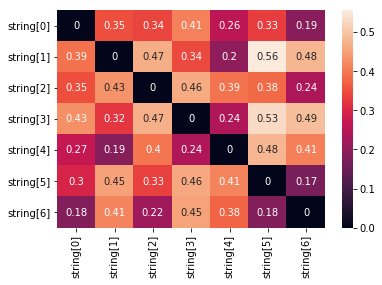

In [17]:
seaborn.heatmap(df_changes_ratio_track, annot=True)

### Table 9: The table represent the number of insert among the changes to transform string[i] to string[j]

In [18]:
df_insert_track = pd.DataFrame(insert_track, columns=['string[0]','string[1]','string[2]',
                                      'string[3]','string[4]','string[5]','string[6]'])
df_insert_track.rename(index={0:'string[0]',1:'string[1]',2:'string[2]',3:'string[3]',
                      4:'string[4]',5:'string[5]',6:'string[6]',}, inplace=True)
df_insert_track

,string[0],string[1],string[2],string[3],string[4],string[5],string[6]
string[0],0,7,10,12,8,17,10
string[1],17,0,17,12,8,26,19
string[2],13,9,0,13,10,21,10
string[3],16,6,13,0,8,23,18
string[4],12,2,11,8,0,20,16
string[5],6,7,6,7,6,0,5
string[6],6,7,3,11,8,12,0


### Table 10: The heatmap represent the number of insert among the changes to transform string[i] to string[j]

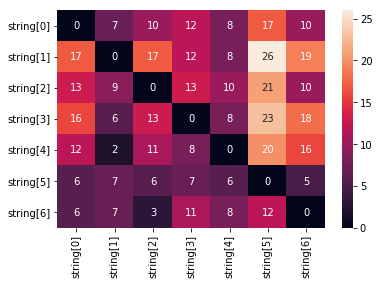

In [19]:
seaborn.heatmap(df_insert_track, annot=True)

### Table 11: The table represent the number of remove among the changes to transform string[i] to string[j]

In [20]:
df_remove_track = pd.DataFrame(remove_track, columns=['string[0]','string[1]','string[2]',
                                      'string[3]','string[4]','string[5]','string[6]'])
df_remove_track.rename(index={0:'string[0]',1:'string[1]',2:'string[2]',3:'string[3]',
                      4:'string[4]',5:'string[5]',6:'string[6]',}, inplace=True)
df_remove_track

,string[0],string[1],string[2],string[3],string[4],string[5],string[6]
string[0],0,17,13,16,12,6,6
string[1],7,0,10,6,2,5,5
string[2],10,16,0,14,11,7,3
string[3],12,12,12,0,8,8,10
string[4],8,8,10,8,0,5,8
string[5],17,28,20,22,21,0,12
string[6],10,21,10,19,16,5,0


### Table 12: Theheatmap represent the number of remove among the changes to transform string[i] to string[j]

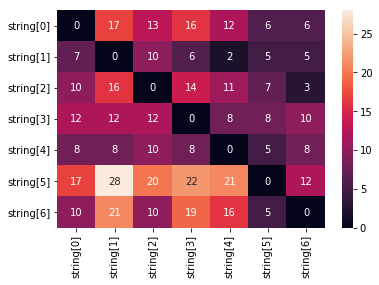

In [21]:
seaborn.heatmap(df_remove_track, annot=True)

### Table 13: The table represent the number of replace among the changes to transform string[i] to string[j]

In [22]:
df_replace_track = pd.DataFrame(replace_track, columns=['string[0]','string[1]','string[2]',
                                      'string[3]','string[4]','string[5]','string[6]'])
df_replace_track.rename(index={0:'string[0]',1:'string[1]',2:'string[2]',3:'string[3]',
                      4:'string[4]',5:'string[5]',6:'string[6]',}, inplace=True)
df_replace_track

,string[0],string[1],string[2],string[3],string[4],string[5],string[6]
string[0],0,11,11,13,6,10,3
string[1],11,0,15,13,8,19,19
string[2],11,17,0,18,17,9,10
string[3],13,13,20,0,7,20,19
string[4],6,8,17,7,0,21,15
string[5],10,15,11,22,19,0,2
string[6],3,15,10,17,15,2,0


### Table 14: The table represent the number of replaces among the changes to transform string[i] to string[j]

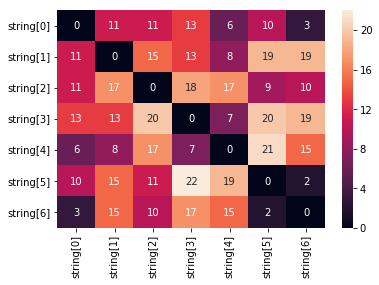

In [23]:
seaborn.heatmap(df_replace_track, annot=True)

### Table 15: The table represent the ratio between the number of insert among the changes to transform string[i] to string[j] and the length of string[i]

In [24]:
df_insert_ratio_track = pd.DataFrame(insert_ratio_track, columns=['string[0]','string[1]','string[2]',
                                      'string[3]','string[4]','string[5]','string[6]'])
df_insert_ratio_track.rename(index={0:'string[0]',1:'string[1]',2:'string[2]',3:'string[3]',
                      4:'string[4]',5:'string[5]',6:'string[6]',}, inplace=True)
df_insert_ratio_track

,string[0],string[1],string[2],string[3],string[4],string[5],string[6]
string[0],0.000000,0.070000,0.100000,0.120000,0.080000,0.170000,0.100000
string[1],0.188889,0.000000,0.188889,0.133333,0.088889,0.288889,0.211111
string[2],0.134021,0.092784,0.000000,0.134021,0.103093,0.216495,0.103093
string[3],0.166667,0.062500,0.135417,0.000000,0.083333,0.239583,0.187500
string[4],0.125000,0.020833,0.114583,0.083333,0.000000,0.208333,0.166667
string[5],0.054054,0.063063,0.054054,0.063063,0.054054,0.000000,0.045045
string[6],0.057692,0.067308,0.028846,0.105769,0.076923,0.115385,0.000000


### Table 16: The heatmap represent the ratio between the number of insert among the changes to transform string[i] to string[j] and the length of string[i]

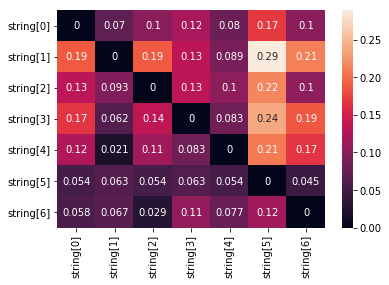

In [25]:
seaborn.heatmap(df_insert_ratio_track, annot=True)

### Table 17: The table represent the ratio between the number of remove among the changes to transform string[i] to string[j] and the length of string[i]

In [26]:
df_remove_ratio_track = pd.DataFrame(remove_ratio_track, columns=['string[0]','string[1]','string[2]',
                                      'string[3]','string[4]','string[5]','string[6]'])
df_remove_ratio_track.rename(index={0:'string[0]',1:'string[1]',2:'string[2]',3:'string[3]',
                      4:'string[4]',5:'string[5]',6:'string[6]',}, inplace=True)
df_remove_ratio_track

,string[0],string[1],string[2],string[3],string[4],string[5],string[6]
string[0],0.000000,0.170000,0.130000,0.160000,0.120000,0.060000,0.060000
string[1],0.077778,0.000000,0.111111,0.066667,0.022222,0.055556,0.055556
string[2],0.103093,0.164948,0.000000,0.144330,0.113402,0.072165,0.030928
string[3],0.125000,0.125000,0.125000,0.000000,0.083333,0.083333,0.104167
string[4],0.083333,0.083333,0.104167,0.083333,0.000000,0.052083,0.083333
string[5],0.153153,0.252252,0.180180,0.198198,0.189189,0.000000,0.108108
string[6],0.096154,0.201923,0.096154,0.182692,0.153846,0.048077,0.000000


### Table 18: The heatmap represent the ratio between the number of remove among the changes to transform string[i] to string[j] and the length of string[i]

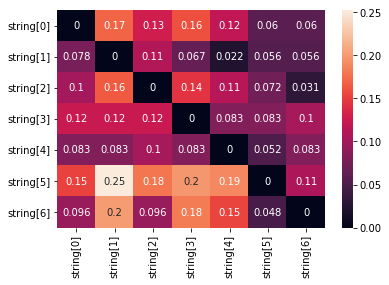

In [27]:
seaborn.heatmap(df_remove_ratio_track, annot=True)

### Table 19: The table represent the ratio between the number of replace among the changes to transform string[i] to string[j] and the length of string[i]

In [28]:
df_replace_ratio_track = pd.DataFrame(replace_ratio_track, columns=['string[0]','string[1]','string[2]',
                                      'string[3]','string[4]','string[5]','string[6]'])
df_replace_ratio_track.rename(index={0:'string[0]',1:'string[1]',2:'string[2]',3:'string[3]',
                      4:'string[4]',5:'string[5]',6:'string[6]',}, inplace=True)
df_replace_ratio_track

,string[0],string[1],string[2],string[3],string[4],string[5],string[6]
string[0],0.000000,0.110000,0.110000,0.130000,0.060000,0.100000,0.030000
string[1],0.122222,0.000000,0.166667,0.144444,0.088889,0.211111,0.211111
string[2],0.113402,0.175258,0.000000,0.185567,0.175258,0.092784,0.103093
string[3],0.135417,0.135417,0.208333,0.000000,0.072917,0.208333,0.197917
string[4],0.062500,0.083333,0.177083,0.072917,0.000000,0.218750,0.156250
string[5],0.090090,0.135135,0.099099,0.198198,0.171171,0.000000,0.018018
string[6],0.028846,0.144231,0.096154,0.163462,0.144231,0.019231,0.000000


### Table 20: The table represent the ratio between the number of remove among the changes to transform string[i] to string[j] and the length of string[i]

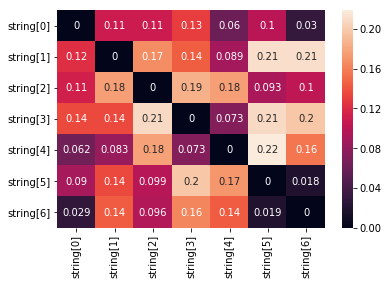

In [29]:
seaborn.heatmap(df_replace_ratio_track, annot=True)

### Building a tree building algorithms

#### In order to have the correct probability of insert, remove, and replace, we can only measure those between the direct relationship pair. Hence. I combine the probability calculation part and the tree building part

#### My idea for tree building algorithm is that I will pick the (genes - 1) lowest changes ratio. The reason is that, a direct relationship will need less effort to change from 1 gene to another compared to changing between 2 non-related genes. 

#### The way we do it is to go through every pair, which is $ ^nC_2$ with n is the number of genes. We then select the smallest n-1 items, represent the direct relations.  The number of direct relations is the number of genes - 1  because each node need to have 1 parents (1 connection) except the grand and these connections are unique and different. Hence, we have connections = number of nodes - 1 = genes - 1 = n-1.

#### From those n-1 distinct relations, I will form a family tree. The basic idea is I find whether each node is identified as "grand", "parent" or "child", depends on the number of its connections. From there, I find the "grand": the root of the tree and start to build down.

#### The algorithm based on the assumption that the direct relations will have lower changes ratio (ratio - the normalized data, not the number of changes). And the algorithm - the tree can only works when there is full generations, meaning every "grand" and "parent" nodes have 2 children; the "parent" and "child" nodes have exactly 1 parent.

#### The strength of the algorithm is that it works in a generic and logical way, if given full generations. Also, the code failed when anomalies happens: when the indirect relations have a lower changes_ratio compared to a direct relations. However, the chances of this happening is quite low. Finally, the edit_distance algorithm assume the genes are changed in the optimal way. In real life, this might not be the case. However, the assumption stated here is reasonable and valid.

In [30]:
# we try to creare a tree 

class Node:
    # each node has 6 properties
    ### name: the name of the node
    ### par: parents
    ### lch: the 1st child
    ### rch: the 2nd child
    ### adj: the nodes those they have close relation with (parents/child)
    ##### adj is only has support roles, not needed in long run
    ### pro: properties: they are grandparents (have no parents), 
    ##### parents (have parents and child), or children (have no child)
    def __init__(self, name):
        # the names of the node
        self.name = name
        # its adjecent values
        self.par = 'None'
        self.lch = 'None'
        self.rch = 'None'
        self.adj = []
        self.pro = 'None'   

        
# This is to add the relation between 2 nodes
### as we don't know the specific relation (parents/children)
### hence, we put in in adj lists
def add_edge(self, node): 
    if node.name not in self.adj: 
        # as A have relation with B means B have relation with A
        # Hence, we add relations to both sides
        self.adj.append(node)
        node.adj.append(self)

        
# After we have the properties list, we can predict the properties
# the properties list is the number of connections each node has
def family(self, properties):
    # if you have only 1 coonnection: you are the child 
    ### (have no children and 1 parent)
    if properties[self.name] == 1:
        self.pro = 'child'
    # if you have only 2 coonnection: you are the grandparents 
    ### (have no parents and 2 children)
    elif properties[self.name] == 2:
        self.pro = 'grand'
        self.lch = self.adj[0]
        self.rch = self.adj[1]
        self.adj[0].par = self
        self.adj[1].par = self
    # other cases: 
    else: 
        self.pro = 'parent'
    return self.pro
    
    
# run through the tree from the root to identify the relationship between nodes
# the self variable is the root (grandparents)
def dfs(self):
    if self.par == 'None':
        # As we start from the grandparents
        # If it has no parents
        # Its adj are its 2 children
        # randomly select the lch and rch based on adj
        self.lch = self.adj[0]
        self.rch = self.adj[1]
        # the relationship is reciprical
        # if A is B's child -> B is A's parents
        self.adj[0].par = self
        self.adj[1].par = self
        # go through the children nodes
        dfs(self.adj[0])
        dfs(self.adj[1])
    elif self.par != 'None':
        # this means this node is not grandparents
        # we remove the parents from the adj list (to only consider the child)
        self.adj.remove(self.par)
        if self.adj != []:
            # this means this node is not a global child 
            # so it has children
            # Its adj are now its 2 children
            # randomly select the lch and rch based on adj
            self.lch = self.adj[0]
            self.rch = self.adj[1]
            # the relationship is reciprical
            # if A is B's child -> B is A's parents
            self.adj[0].par = self
            self.adj[1].par = self
            # go through the children nodes
            dfs(self.adj[0])
            dfs(self.adj[1])

# print the property node
def output(gpr): 
    # name and property
    print(gpr.name, ": ", gpr.pro, end = ', ')
    
    # if not 'grand', then it will have parents
    if gpr.pro == 'grand': 
        print("par: no parents", end = ', ')
    else: 
        print('par: ', gpr.par.name, end = ', ')
        
    # if not global child, it will have children
    if gpr.pro == 'child': 
        print("child: no children")
    else: 
        print("child: ", gpr.lch.name, ' - ', gpr.rch.name)

# here is the number of genes we have
genes = 7

# Create the list to contain the nodes' information
Nodes = []
for i in range(genes):
    Nodes.append(Node(i))

# the list contain the number of changes (edit_distance) from string i to j
changes = []

# create all pair wise combination of genes and go through edit_distance
for i in range(genes):
    for j in range(i+1,genes):
        # we use the ratio table as we know the number of changes might not efficient
        # the number of changes is also dependent on the length of the string
        # Hence, use the ratio to normalize the data
        changes.append(changes_ratio_track[i][j])
# sort the list
changes.sort()

# the properties function is about the connections of one node
properties = [0]*genes

related_insert_ratio = []
related_remove_ratio = []
related_replace_ratio = []

# run through the nodes again
for i in range(genes):
    for j in range(i+1,genes):
        # if the ratio is in the minimum (genes-1) of the ratio
        # the reason the genes-1 is because if:
        ### the number of genes is of 3 generations: genes = 2^3-1 = 7 genes
        ### the number of connection is the number of genes - 1
        ### because each node need to have 1 parents (1 connection) except the grand
        ### and these connections are unique and different
        ### hence, we have connections = number of nodes - 1 = genes - 1
        if changes_ratio_track[i][j] in changes[0:genes-1]:
            # add 1 connections to the properties list
            properties[i] += 1
            properties[j] += 1
            related_insert_ratio.append(insert_ratio_track[i][j])
            related_remove_ratio.append(remove_ratio_track[i][j])
            related_replace_ratio.append(replace_ratio_track[i][j])
            # add edge
            add_edge(Nodes[i], Nodes[j])

# use the family function to find the properties of the nodes
# also find the grand parents through this
for i in range(genes):
    a = family(Nodes[i], properties)
    # find grandparents
    if a == 'grand':
        gpr = i

# run through the tree from the root to find the relationship
dfs(Nodes[gpr])

# print the properties of the tree
for i in Nodes:
    output(i)

0 :  grand, par: no parents, child:  4  -  6
1 :  child, par:  4, child: no children
2 :  child, par:  6, child: no children
3 :  child, par:  4, child: no children
4 :  parent, par:  0, child:  1  -  3
5 :  child, par:  6, child: no children
6 :  parent, par:  0, child:  2  -  5


### The probability of insert, remove, and replace. 
In the code above, I kept track of the insert, remove, replace ratio of the direct relationship. Hence, we can simply compute the mean of those ratios to find the probability of each operations. 

In [31]:
print("the probability of insert: ", np.mean(related_insert_ratio))
print("the probability of remove: ", np.mean(related_remove_ratio))
print("the probability of replace: ", np.mean(related_replace_ratio))

the probability of insert:  0.08339334179540366
the probability of remove:  0.07076524978586834
the probability of replace:  0.06215272617978803


### Complexity

#### The lcs operation

The lcs algorithm (lcs(str1, str2, m, n)) has 2 for loops, each runs m and n times, with m,n is the length of the genes. Given $M$ be the length of a gene, the lcs algorithm for 2 genes will run $M^2$ times.

Hence, my lcs operation runs in $O(M^2)$. 

In order to trace what operation happens, I have the print_lcs() function to retrieve the length of the lcs. My print_lcs will run step by step using North (up), West (left) or Northwest (diagonal) in the $M^2$ table. If will cost at least $M$ steps (if we only go Northwest) and at most $2M$ steps (don't use Northwest operation, only use North or West). The operation inside is merely constant time. Regardless of the case, this will be linear time: $O(M)$.

Hence, returning lcs will be $O(M^2) + O(M):$ which is $O(M^2)$

 We have $^NC_2$ pairs of genes. Also, in my code, as I want to compute the $N*N$ table, I ran 2 for loops, each runs N times to compute all possible pairs of gene. Hence, I ran the lcs() $N^2$ times (Also because $^NC_2$ and $N^2$ only differ by the factor of 2 (a constant) when $N$ becomes large (sill the same big O notation). 
 
We run the lcs function $N^2$ times: Computing the whole table costs $O(N^2 * M^2)$

Also, we used 2 $(M+1)(M+1)$ tables to store results.

This is indeed a much better result comparing to brute force approach, where we expand all possible subsets of each string and compare those subsets, which would result in exponential complexity: $O(2^{2M})$ for each lcs, and then $N^2$ time of those to get the table: $O(N^2 * 2^{2M})$:inefficient

#### The edit distance operation (to find insert, remove, replace)

The edit distance algorithm (edit_distance(str1, str2, m, n)) has 2 for loops, each runs m and n times, with m,n is the length of the genes. Given $M$ be the length of a gene, the lcs algorithm for 2 genes will run $M^2$ times.

Hence, my edit distance operation runs in $O(M^2)$. 

In order to trace what operation happens, I have the print_editdistance() function to retrieve the number of changes and the number of each insert, remove, or replace. My print_editdistance will run step by step using insert (up), remove (left) or replace (diagonal) in the $M^2$ table. If will cost at least $M$ steps (if we only go diagonal) and at most $2M$ steps (don't use replace operation, only use delete or insert). The operation inside is merely constant time. Regardless of the case, this will be linear time: $O(M)$.

Hence, returning the number of changes will be $O(M^2) + O(M):$ which is $O(M^2)$

 We have $^NC_2$ pairs of genes. Also, in my code, as I want to compute the $N*N$ table, I ran 2 for loops, each runs N times to compute all possible pairs of gene. Hence, I ran the edit_distance() $N^2$ times (Also because $^NC_2$ and $N^2$ only differ by the factor of 2 (a constant) when $N$ becomes large (still the same big O notation). 
 
We run the edit_distance function $N^2$ times: Computing the whole table costs $O(N^2 * M^2)$

Also, we used 2 $(M+1)(M+1)$ tables to store results.

This is indeed a much better result comparing to brute force approach, where we expand all possible sets of operations of each string and compare those subsets:, which would result in exponential complexity: $O(3^{2M})$. It is the exponential of 3 because there are 3 possible operations. Then $N^2$ time of those to get the table: $O(N^2 * 3^{2M})$: inefficient

#### The tree building algorithm

I merged all the elements of the upper half above the diagonal line of the table into 1 list: $^NC_2$ elements, which is approximately $N^2/2$ when $N$ is extremely large. Then I used Python sort function to sort the list, which will cost $n\log n $ time with n is the number of elements. Hence, the complexity is $O(N^2/2.\log(N^2/2)$, which is $O(N^2\log N)$ time .

Then I find location of the (N-1) minimum elements of the list by going through it every elements again. Going through the list will cost $O(N^2)$. Checking if the element is in the top (N-1) element would cost O(N). This cost $O(N^3)$ complexity. 

After having the top (N-1) element, which are the direct relationships. Then we start buidling the tree. 

The family() function and dfs() function of the tree will cost $O(N)$ time as we run through every nodes of the tree (which is $N$ Node). The operation inside will only cost constant time.

Hence, the total time for building a tree is: $O(N^2 \log N) + O(N^3) + O(N)$, which is $O(N^3)$

This is an efficient way if we compare with where we have to compute all possible trees, which is $N!$: N factorial. However, my code can surely be modified for optimization. I can create a max heap with $N-1$ nodes. As I go through the list, if the element is smaller than the root of the max heap, I pop the root, replace by this element (insert) and max_heapify. This will definitely cost smaller complexity as max_heapify costs $O(logN)$ time, which will make the search for the minimum $N-1$ elements $O(N^2 \log n)$ time. However, in the scope of this assignment, I will not perform such heap data structure.

Three differences between this assignment and inferring relationships in real gene sequences.

In this assignment, I assume the genes are changed in the optimal way, which might not be the case for real life genetic inheritance.

This is the core difference which can lead to my tree building and edit_distance fail to detect the family tree.

## HC Application

##### #variables: I identify the ratio vriables, which helps to normalize the normal length of lcs. I also identified the dependence of the length of the lcs and the length of the original string, which leads to the ratio variable. Furthermore, I calculated the  probability of insert, remove, and replace by tracking each variable individually, identify all components of the possible operations. This has demonstrated a deep knowledge on #variables application

##### #deduction: In order to identify the relations of the family tree, I used a sequence of logical, deductive arguments (e.g. 4 is "parent" because 4 has 3 direct relations; 0 is "grand" because it is the intersection of 2 sets of direct relation of 2 parents, etc.). These deductive arguments are effective, accurate in order to find the tree. This has proven a deep knowledge on #deduction.